In [1]:
# Dependencies 
import os
import glob
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk
from scipy.stats import t
from soundsig.sound import BioSound
from scipy.stats import f



In [2]:
# Some paths
rootPath = '/Users/frederictheunissen/Google Drive/My Drive/julie/'
pklPath = 'pkl/'


# The 6 birds from Julie data set
birds = ['BlaBro09xxF', 'GreBlu9508M', 'WhiBlu5396M', 'LblBlu2028M', 'WhiWhi4522M', 'YelBlu6903F']

# Color code for call type
callColor = {'Be': (0/255.0, 230/255.0, 255/255.0), 'LT': (0/255.0, 95/255.0, 255/255.0), 'Tu': (255/255.0, 200/255.0, 65/255.0), 'Th': (255/255.0, 150/255.0, 40/255.0), 
             'Di': (255/255.0, 105/255.0, 15/255.0), 'Ag': (255/255.0, 0/255.0, 0/255.0), 'Wh': (255/255.0, 180/255.0, 255/255.0), 'Ne': (255/255.0, 100/255.0, 255/255.0),
             'Te': (140/255.0, 100/255.0, 185/255.0), 'DC': (100/255.0, 50/255.0, 200/255.0), 'So': (255/255.0, 255/255.0, 255/255.0)}



In [3]:
# Load the data base
outPath = rootPath+'JulieDataBase.pkl'
fileIn = open(outPath,"rb")
dfDataBase = pk.load(fileIn)
pcKDE = pk.load(fileIn)
fileIn.close()

dfDataBaseNW = dfDataBase[dfDataBase['call'] != 'Wh']

In [4]:
# Number of Units
unitNames = np.unique(dfDataBaseNW['site']+'_'+ dfDataBaseNW['unit'])
nunits = unitNames.shape[0]

# Number of Calls
callNames = np.unique(dfDataBaseNW['call'])
ncalls = callNames.shape[0]

# Stims per Units
nstimsUnit = dict()
unitNamesFull = []
for unit in unitNames:
    nstimsUnit[unit] = len(np.unique(dfDataBaseNW['stim'][dfDataBaseNW['site']+'_'+ dfDataBaseNW['unit'] == unit]))
    # Select only Units with 110 stimuli (for now)
    if (nstimsUnit[unit] >= 110):
        unitNamesFull.append(unit)
    
nunitsFull = len(unitNamesFull)

print(nunitsFull)



609


In [5]:
# Read the results of single neuron simulation for the ones used in the 20 V2. That second
# simulation had more cross-validations (100) and the calculation of the selectivity entropy. 

# Read the PC and Confusion matrices data base for 1 neuron ensembles
inPath = rootPath + pklPath + 'JulieDataBase1GoodUnitPCV2.pkl'
fileIn = open(inPath,"rb")
unitNamesFull = pk.load(fileIn)
confMatTot = pk.load(fileIn)
pcc = pk.load(fileIn)
selH = pk.load(fileIn)
confMatCount = pk.load(fileIn)


# These are the neurons that we will be keeping
# indGood = np.argwhere(pcc > 13).flatten()           # 13 instead of 12 because only 9 call types
# nGood = indGood.shape[0]

In [6]:
#pccGood = pcc[indGood]
#unitNamesGood = [unitNamesFull[i] for i in indGood]

pccGood = pcc
unitNamesGood = [unit[0] for unit in unitNamesFull]
indSort = np.flip(np.argsort(pccGood))

# Printing the name of the most discriminating units
for ind in indSort:
    print(unitNamesGood[ind], pccGood[ind])

Site4_L1500R1500_e16_s0_ss2 40.128206908641744
Site4_L1500R1900_e22_s0_ss1 38.77103701509421
Site3_L1200R1200_e2_s0_ss3 38.595197754753265
Site3_L1200R1200_e22_s0_ss1 36.6647859397828
Site3_L1250R1650_e13_s0_ss1 35.0341466284414
Site4_L1500R1500_e16_s0_ss1 34.801000395973745
Site3_L1250R1650_e2_s0_ss1 34.44355778656887
Site3_L1200R1200_e15_s0_ss1 34.31995489589424
Site3_L1900R1800_e32_s0_ss1 34.13405217696591
Site3_L1250R1650_e21_s0_ss2 33.91650959998163
Site4_L1500R1900_e12_s0_ss1 33.173090585329895
Site3_L1200R1200_e4_s0_ss1 33.105764926092206
Site3_L1250R1650_e14_s0_ss1 32.282873927350586
Site3_L1200R1200_e3_s0_ss1 31.630683033449962
Site2_L1000R900_e3_s0_ss1 29.291606730789105
Site5_L1800R2100_e22_s0_ss1 29.284832221766287
Site4_L1500R1900_e4_s0_ss1 29.15563325266513
Site5_L1800R2100_e22_s0_ss2 29.124837901378047
Site4_L2100R2050_e22_s0_ss1 29.114554712980546
Site2_L1100R1450_e3_s0_ss2 29.030034976304815
Site4_L2100R2050_e18_s0_ss2 28.919652835425985
Site3_L1250R1650_e21_s0_ss1 28.

In [7]:
# THis is to load the neurons that did well as a group of 20  

inPath = rootPath+ pklPath + 'JulieDataBase20GoodUnitPCPerZone.pkl'
fileIn = open(inPath,"rb")
argListZones = pk.load(fileIn)
confMatZones = pk.load(fileIn)
pccZones = pk.load(fileIn)
selHZones = pk.load(fileIn)
zoneUnique = pk.load(fileIn)
fileIn.close()


In [8]:
for izone, zone in enumerate(zoneUnique):
    print(zone, len(pccZones[izone]))

L 801
NCM-CMM 801


In [9]:
# Take the one group with the highest pcc
indListMaxZones = []
for izone, zone in enumerate(zoneUnique):

    indListMax = np.argwhere(pccZones[izone] == pccZones[izone].max())[0][0]
    print(zone, ':')
    print(argListZones[izone][indListMax])
    print(pccZones[izone][indListMax])
    print()
    indListMaxZones.append(indListMax)

L :
['Site3_L1250R1650_e14_s0_ss1', 'Site2_L1100R1450_e3_s0_ss2', 'Site3_L1250R1650_e16_s0_ss1', 'Site2_L1100R1450_e28_s0_ss1', 'Site3_L1250R1650_e13_s0_ss1', 'Site4_L1500R1900_e19_s0_ss1', 'Site2_L1100R1450_e28_s0_ss2', 'Site5_L1800R2100_e29_s0_ss1', 'Site1_L750R1100_e14_s0_ss2', 'Site5_L1800R2100_e30_s0_ss2', 'Site5_L1800R2100_e20_s0_ss3', 'Site5_L1800R2100_e13_s0_ss2', 'Site5_L1800R2100_e29_s0_ss2', 'Site4_L1500R1900_e15_s0_ss2', 'Site1_L750R1100_e6_s0_ss2', 'Site3_L1250R1650_e21_s0_ss1', 'Site1_L750R1100_e30_s0_ss2', 'Site1_L750R1100_e10_s0_ss1', 'Site2_L1100R1450_e20_s0_ss1', 'Site2_L1100R1450_e10_s0_ss2']
69.95920990791575

NCM-CMM :
['Site3_L1250R1650_e31_s0_ss1', 'Site5_L1800R2100_e9_s0_ss1', 'Site4_L1500R1900_e22_s0_ss1', 'Site5_L1800R2100_e12_s0_ss1', 'Site4_L1500R1900_e31_s0_ss1', 'Site3_L1250R1650_e22_s0_ss1', 'Site3_L1250R1650_e2_s0_ss1', 'Site4_L1500R1900_e32_s0_ss1', 'Site2_L1100R1450_e22_s0_ss1', 'Site3_L1250R1650_e17_s0_ss3', 'Site1_L750R1100_e20_s0_ss1', 'Site2_L1100R

In [11]:
# Take the one group with the lowest pcc
indListMinZones = []
for izone, zone in enumerate(zoneUnique):

    indListMin = np.argwhere(pccZones[izone] == pccZones[izone].min())[0][0]
    print(zone, ':')
    print(argListZones[izone][indListMin])
    print(pccZones[izone][indListMin])
    print()
    indListMinZones.append(indListMin)

L :
['Site1_L750R1100_e16_s0_ss2', 'Site2_L1100R1450_e29_s0_ss3', 'Site1_L750R1100_e18_s0_ss1', 'Site1_L750R1100_e29_s0_ss1', 'Site5_L1800R2100_e13_s0_ss2', 'Site1_L750R1100_e30_s0_ss2', 'Site4_L1500R1900_e15_s0_ss2', 'Site1_L750R1100_e5_s0_ss1', 'Site5_L1800R2100_e26_s0_ss1', 'Site2_L1100R1450_e19_s0_ss3', 'Site1_L750R1100_e30_s0_ss3', 'Site1_L750R1100_e14_s0_ss2', 'Site3_L1250R1650_e3_s0_ss2', 'Site5_L1800R2100_e29_s0_ss4', 'Site1_L750R1100_e10_s0_ss1', 'Site1_L750R1100_e26_s0_ss2', 'Site4_L1500R1900_e20_s0_ss1', 'Site2_L1100R1450_e3_s0_ss1', 'Site1_L750R1100_e22_s0_ss1', 'Site3_L1250R1650_e12_s0_ss1']
45.09997227750176

NCM-CMM :
['Site1_L500R400_e32_s0_ss3', 'Site4_L1500R1500_e32_s0_ss2', 'Site2_L1000R900_e20_s0_ss3', 'Site2_L1000R900_e20_s0_ss1', 'Site3_L1200R1200_e32_s0_ss3', 'Site2_L1000R900_e17_s0_ss2', 'Site4_L1500R1500_e29_s0_ss1', 'Site4_L1500R1500_e8_s0_ss2', 'Site3_L1200R1200_e9_s0_ss3', 'Site3_L1200R1200_e30_s0_ss1', 'Site4_L1500R1500_e18_s0_ss2', 'Site2_L1000R900_e26_s0_

In [12]:
print(indListMaxZones)
print(indListMinZones)

[480, 701]
[171, 774]


In [13]:
# Read the Modulation Transfer Functions

inPath = rootPath+ pklPath + 'JulieGoodUnitsMPS_PC.pkl'

fileIn = open(inPath,"rb")
unitNamesGood= pk.load(fileIn)
mpsAVGList = pk.load(fileIn)
mpsTRGList = pk.load(fileIn)
wt = pk.load(fileIn)
wf = pk.load(fileIn)
fileIn.close()


In [14]:
# Calculate relative power in each componnent.
allz = []
allPC = []
neuralNoise = np.zeros(len(unitNamesGood,))

for i,unit in enumerate(unitNamesGood):
    unitIndex = dfDataBaseNW.index[dfDataBaseNW['site']+'_'+ dfDataBaseNW['unit'] == unit]
    unitNoise = {'Be': [], 'LT': [], 'Th': [], 
             'Di': [], 'Ag': [], 'Ne': [],
             'Te': [], 'DC': [], 'So': []}
    for ind in unitIndex:
        allz.append(dfDataBase['z'][ind])
        allPC.append(dfDataBase['PC'][ind])
        unitNoise[dfDataBase['call'][ind]].append(dfDataBase['z'][ind])
    
    unitNoiseComb = 0
    for callType in unitNoise:
        mean = np.mean(unitNoise[callType])
        std = np.std(unitNoise[callType])
        #if mean == 0 :
        #    unitNoiseComb += 1
        #else:
        #    unitNoiseComb += std/np.abs(mean)
        unitNoiseComb += std**2
    neuralNoise[i] = unitNoiseComb/9.0
        
stdz = np.std(allz)
stdPC = np.std(np.array(allPC), axis = 0)

In [15]:
# Read the Modulation Power Spectra and Spectrogram

inPath = rootPath+ pklPath + 'JulieStimMPS.pkl'

fileIn = open(inPath,"rb")
callMPS = pk.load(fileIn)
wt = pk.load(fileIn)
wf = pk.load(fileIn)
callSpectro = pk.load(fileIn)
fileIn.close()


In [16]:
# Between and Within Covariances
indTLow = np.argwhere(wt>-50)[0][0]
indTHigh = np.argwhere(wt>50)[0][0]
indFLow = np.argwhere(wf>=0)[0][0]
indFHigh = np.argwhere(wf*1000>4)[0][0]

callMPSMeans = []
for calltype in callMPS:
    for i, mps in enumerate(callMPS[calltype]):
        if i == 0:
            mpsavg = np.copy(mps[indFLow:indFHigh, indTLow:indTHigh])
        else:
            mpsavg += mps[indFLow:indFHigh, indTLow:indTHigh]
    
    callMPSMeans.append((mpsavg/len(callMPS[calltype])).flatten())
    
betweenCov = np.cov(np.array(callMPSMeans).transpose())


withinCovCall = []
overallCovData = []
for icall, calltype in enumerate(callMPS):
    callMPSWithin = []
    for mps in callMPS[calltype]:
        mpstemp = np.copy(mps[indFLow:indFHigh, indTLow:indTHigh])
        callMPSWithin.append(mpstemp.flatten() - callMPSMeans[icall])
        overallCovData.append(mpstemp.flatten())
        
    withinCovCall.append(np.cov(np.array(callMPSWithin).transpose()))
    
withinCov = np.mean(withinCovCall, axis = 0)
overallCov = np.cov(np.array(overallCovData).transpose())

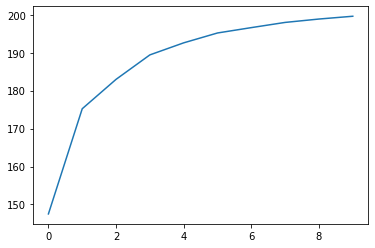

In [17]:
# Look at the DFA Space:
eigMatrix = np.matmul(np.linalg.pinv(withinCov, rcond = 0.0001, hermitian=True), betweenCov)
#eigMatrix = betweenCov
#eigMatrix = overallCov
eigVal, eigVect = np.linalg.eigh(eigMatrix)
plt.plot(np.cumsum(np.abs(eigVal[0:10])))

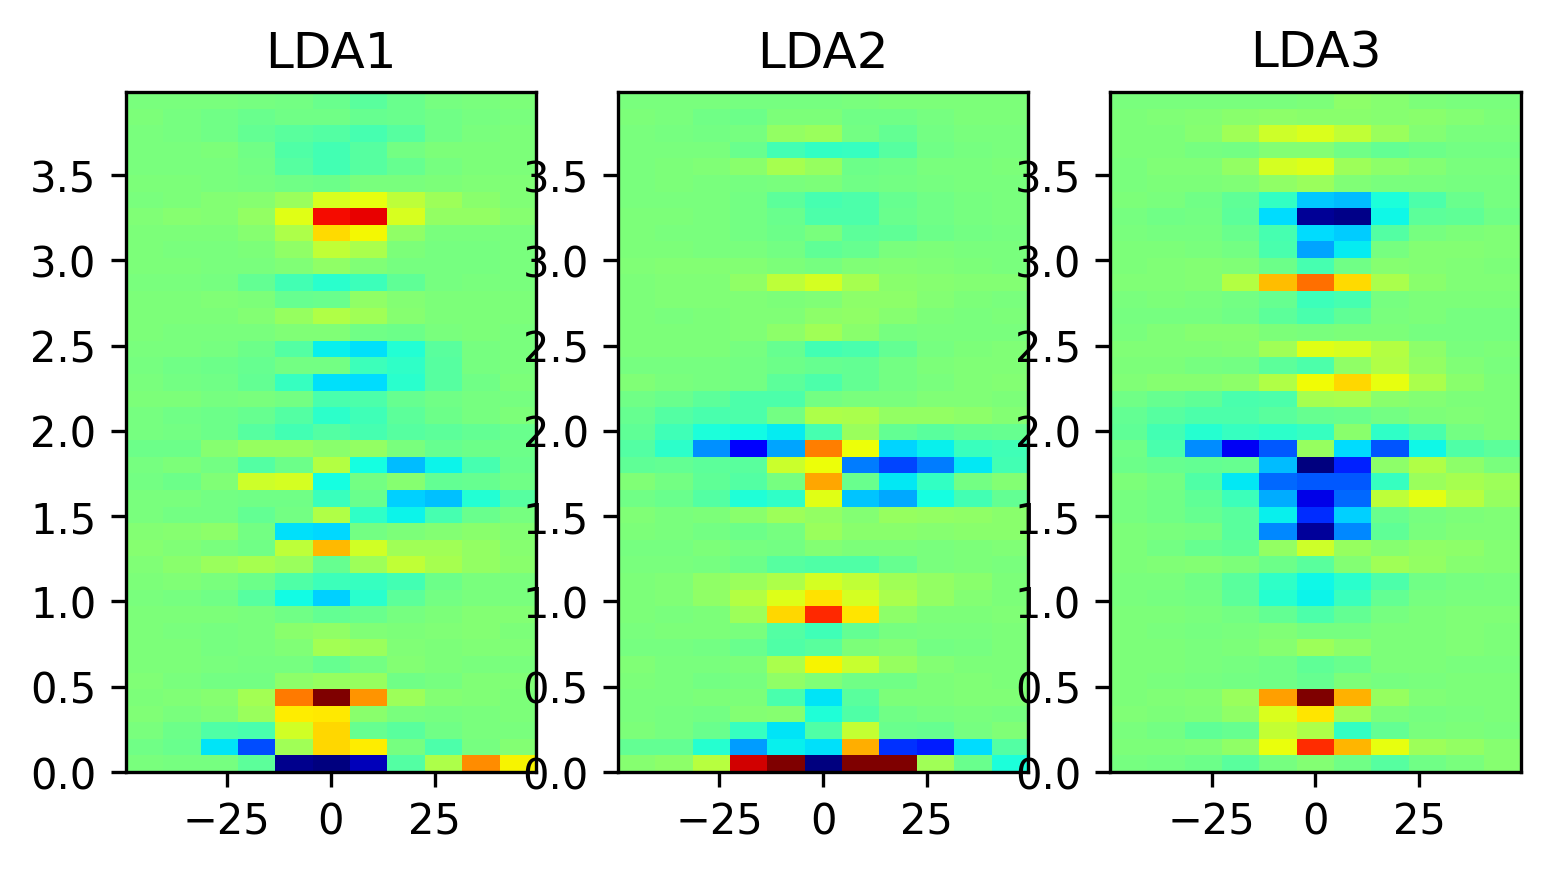

In [18]:
plt.figure(dpi=300, figsize= (6, 3))
ex = (wt[indTLow], wt[indTHigh-1], wf[indFLow]*1e3, wf[indFHigh-1]*1e3)
cmap = plt.get_cmap('jet')
                
for iplot in range(3):
    plt.subplot(1,3,1+iplot)
    plt.imshow(np.reshape(eigVect[:,iplot], mpstemp.shape), interpolation='nearest', aspect='auto', origin='lower', cmap=cmap, extent=ex)
    plt.clim(-0.25,0.25)

    plt.title('LDA%d' % (iplot+1))
        
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


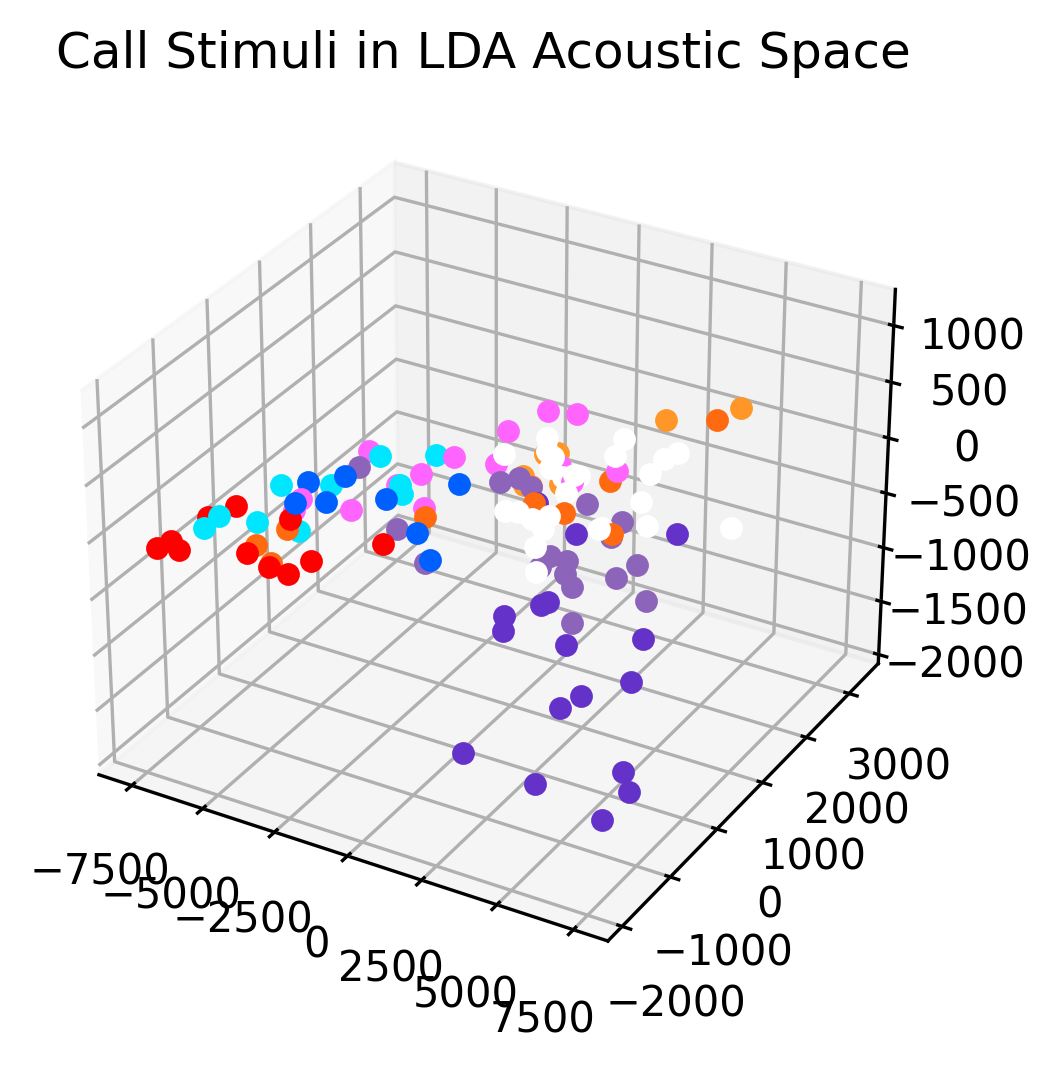

In [19]:
# Make a scatter plot to show call type centroids in PC space

callMPSLDA = {'Be': [], 'LT': [], 'Th': [], 
             'Di': [], 'Ag': [], 'Ne': [],
             'Te': [], 'DC': [], 'So': []}
   
for icall, calltype in enumerate(callMPS):
    for mps in callMPS[calltype]:
        mpstemp = mps[indFLow:indFHigh, indTLow:indTHigh]
        mpstemp = mpstemp.flatten()    
        # print(calltype, ':', np.std(mpstemp))
        callMPSLDA[calltype].append(np.array([np.dot(eigVect[:,0], mpstemp), np.dot(eigVect[:,1], mpstemp), np.dot(eigVect[:,2], mpstemp) ]))
        
fig = plt.figure(dpi=300)
ax = fig.add_subplot(projection='3d')
for calltype in callMPSLDA:
    for xyz in callMPSLDA[calltype]:
        ax.scatter(xyz[0], xyz[1], xyz[2], marker = 'o', color = callColor[calltype])
        
plt.title('Call Stimuli in LDA Acoustic Space')
        
plt.savefig('/Users/frederictheunissen/Desktop/callTypeLDAJulie.eps')

In [20]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d.proj3d import proj_transform

class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

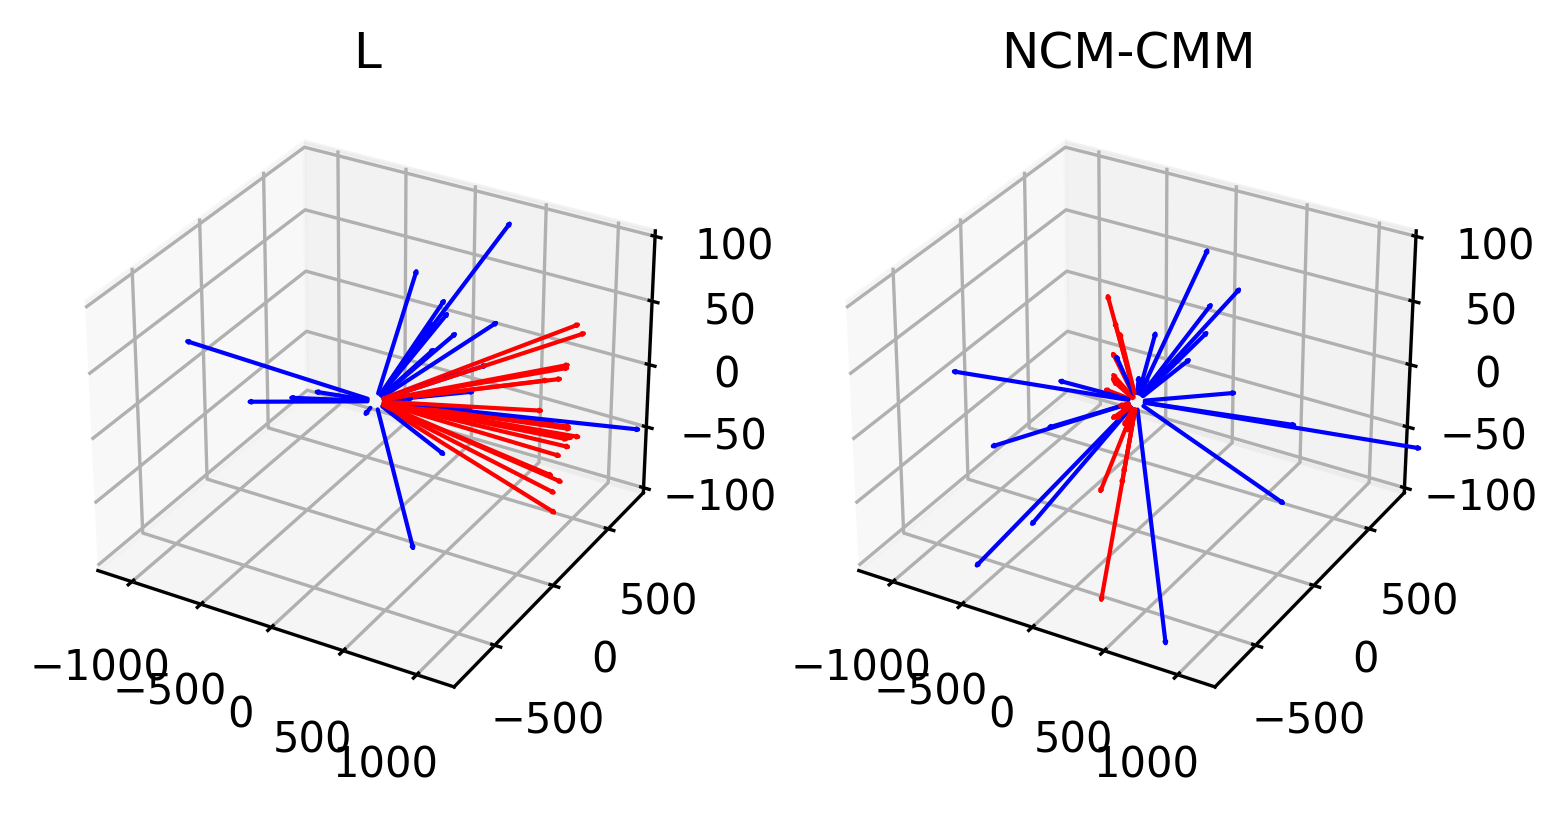

In [21]:
# Plot MTF of best and worst 20 Neurons in LDA space.

fig = plt.figure(dpi=300)
nZones = len(zoneUnique)

for izone, zone in enumerate(zoneUnique):

    # Calculate the position of the best neurons
    unitMTFLDABest = []
    for unit in argListZones[izone][indListMaxZones[izone]]:
        indUnit = np.argwhere(np.array(unitNamesGood) == unit)[0][0]
        mtf = np.copy(mpsTRGList[indUnit][0][indFLow:indFHigh, indTLow:indTHigh]).flatten()
        x = np.dot(eigVect[:,0], mtf)/110
        y = np.dot(eigVect[:,1], mtf)/110
        z = np.dot(eigVect[:,2], mtf)/110
        unitMTFLDABest.append(np.array([x,y,z]))

    unitMTFLDABest = np.vstack(unitMTFLDABest)

    # Calculate the position of the worst neurons
    unitMTFLDAWorst = []
    for unit in argListZones[izone][indListMinZones[izone]]:
        indUnit = np.argwhere(np.array(unitNamesGood) == unit)[0][0]
        mtf = np.copy(mpsTRGList[indUnit][0][indFLow:indFHigh, indTLow:indTHigh]).flatten()
        x = np.dot(eigVect[:,0], mtf)/110
        y = np.dot(eigVect[:,1], mtf)/110
        z = np.dot(eigVect[:,2], mtf)/110
        unitMTFLDAWorst.append(np.array([x,y,z]))

    unitMTFLDAWorst = np.vstack(unitMTFLDAWorst)    
    
    
    # Plot the data

    ax = fig.add_subplot(1, nZones, izone+1, projection='3d')

    for i in range(unitMTFLDABest.shape[0]):
        ax.arrow3D(0, 0, 0, unitMTFLDABest[i,0], unitMTFLDABest[i,1], unitMTFLDABest[i,2], arrowstyle="-|>", color='blue', lw=1)
        ax.arrow3D(0, 0, 0, unitMTFLDAWorst[1,0], unitMTFLDAWorst[i,1],unitMTFLDAWorst[i,2], arrowstyle="-|>", color='red', lw= 1)

    ax.set_xlim(-1200, 1200)
    ax.set_ylim(-800, 800)
    ax.set_zlim(-100, 100)
    ax.title.set_text(zone)
    # plt.title('Neuronal Sampling Acoustic Space')

plt.savefig('/Users/frederictheunissen/Desktop/NeuronZLDALinesJuliePerZone.pdf')

In [22]:
print('Vol Best', np.power(np.prod(unitMTFLDABest.max(axis=0)-unitMTFLDABest.min(axis=0)),1/3))
print('Vol Worst', np.power(np.prod(unitMTFLDAWorst.max(axis=0)-unitMTFLDAWorst.min(axis=0)),1/3))

Vol Best 859.848960091946
Vol Worst 452.864821553213


In [23]:
np.linalg.det(np.cov(unitMTFLDABest.transpose()))

58706433142380.47

In [24]:
# Read data files 
inPathJ = rootPath+pklPath+'summarySelJulie.pkl'
fileInJ = open(inPathJ,"rb")
dfSummaryJ = pk.load(fileInJ)
fileInJ.close()

# Add a field called site_unit to match what is in argList
dfSummaryJ['site_unit'] = dfSummaryJ['unit']
for irow, row in dfSummaryJ.iterrows(): 
    dfSummaryJ.at[irow, 'site_unit'] = (row.site_unit.split('/')[-1]).split('.')[0]

In [25]:
# This volume also uses the PC's

volumeLDAZones = []
noiseGroupZones = []
selHGroupZones = []
selzGroupZones = []

for izone, zone in enumerate(zoneUnique):
    argList = argListZones[izone]

    volumeLDA = np.zeros((len(argList),))
    noiseGroup = np.zeros((len(argList),))
    selHGroup = np.zeros((len(argList)))
    selzGroup = np.zeros((len(argList)))

    for ilist, unitList in enumerate(argList):
        unitMTFLDA = []
        noiseList = 0
        selHList = 0
        selzList = 0
        for unit in unitList:
            indUnit = np.argwhere(np.array(unitNamesGood) == unit)[0][0]
            mtf = np.copy(mpsTRGList[indUnit][0][indFLow:indFHigh, indTLow:indTHigh]).flatten()
            x = np.dot(eigVect[:,0], mtf)/(110*stdz)
            y = np.dot(eigVect[:,1], mtf)/(110*stdz)
            z = np.dot(eigVect[:,2], mtf)/(110*stdz)
            unitMTFLDA.append(np.array([x,y,z]))
            noiseList += neuralNoise[indUnit]
            selHList += selH[indUnit]
            selzList += dfSummaryJ['selInd'][dfSummaryJ['site_unit']==unit].values[0]
            for ipc in range(5):
                mtf = np.copy(mpsTRGList[indUnit][ipc+1][indFLow:indFHigh, indTLow:indTHigh]).flatten()
                x = np.dot(eigVect[:,0], mtf)/(110*stdPC[ipc])
                y = np.dot(eigVect[:,1], mtf)/(110*stdPC[ipc])
                z = np.dot(eigVect[:,2], mtf)/(110*stdPC[ipc])
                unitMTFLDA.append(np.array([x,y,z]))
        
        unitMTFLDA = np.vstack(unitMTFLDA)
    
        # Two ideas for volume:  the determinant of the covariance matrix or the power of max-min
        #volumeLDA[ilist] = np.power(np.prod(unitMTFLDA.max(axis=0)-unitMTFLDA.min(axis=0)),1/3)
        volumeLDA[ilist] = np.linalg.det(np.cov(unitMTFLDA.transpose()))
        noiseGroup[ilist] = noiseList/len(unitList)
        selHGroup[ilist] = selHList/len(unitList)
        selzGroup[ilist] = selzList/len(unitList)
        
    volumeLDAZones.append(volumeLDA)
    noiseGroupZones.append(noiseGroup)
    selHGroupZones.append(selHGroup)
    selzGroupZones.append(selzGroup)

In [26]:
def bivariateReg(x, y, xlabel = 'x', ylabel = 'y', title = 'Bivariate', xlim = [], ylim = [], ax = []):
    # Performs a bivariate regression, plots the line and stats.

    from random import sample
    from scipy.stats import f

    if ax == []:
        fig = plt.figure(figsize=(4,4), dpi=300)
        ax = plt.subplot()
    
    # Force x, y into numpy arrays
    x = np.array(x)
    y = np.array(y)
    
    if xlim == []:
        xlim = (x.min(), x.max())
    if ylim == []:
        ylim = (y.min(), y.max())

    n = len(x)  # Data size

    # We are plotting a subset of the data
    if n > 1000 :
        selInd = sample(range(n), 1000)
    else:
        selInd = range(n)

    ax.scatter(x[selInd], y[selInd], s=1, color='grey', marker = ',')  
    
        
    # fit a linear curve an estimate its y-values and their error.
    a, b = np.polyfit(x, y, deg=1)

    # Calculate error and statistics
    sse = np.sum((y-(a*x+b))**2)
    xmean = np.mean(x)
    ssx = np.sum((x - xmean)**2)
    sst = np.sum((y-np.mean(y))**2)
    syx = np.sqrt(sse/(n-2))
    sy  = np.sqrt(sst/(n-1))
    r2adj = 1. - syx**2/sy**2
    fval = (sst-sse)/syx**2
    pval = 1. - f.cdf(fval, dfn=1, dfd=n-2)  # This is for independent data only.

    # Plot the regression line and error bars for the subset of points (to avoid clutter)
    xsel = x[selInd]
    ysel = y[selInd]
    indSort = np.argsort(xsel)
    xsel = xsel[indSort]
    ysel = ysel[indSort]
    
    y_est = a * xsel + b
    y_err = syx * np.sqrt(1/n + ((xsel - xmean)**2 / ssx) )


    ax.plot(xsel, y_est, '-')
    ax.fill_between(xsel, y_est - y_err, y_est + y_err, alpha=0.2)

    ax.set( xlim= xlim,
        ylim= ylim,
        ylabel=ylabel,
        xlabel=xlabel,
        title=title)

    # fig.colorbar(im_, ax=ax)
    #plt.savefig('/Users/frederictheunissen/Desktop/scatter%s%s.eps' % (xlabel, ylabel))
    return r2adj, fval, pval, sse, sst

In [27]:
# Calculate the number of units in each group to get the correct df
nZones = len(zoneUnique)
unitNumber = []
for izone, zone in enumerate(zoneUnique):
    unitNumber.append(np.unique(argListZones[izone]).shape[0])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


L : R2= 0.6575392196008696 F(1, 128 )= 249.45619210055125 p= 1.1102230246251565e-16
NCM-CMM : R2= 0.5977429147284208 F(1, 173 )= 259.93899117553 p= 1.1102230246251565e-16


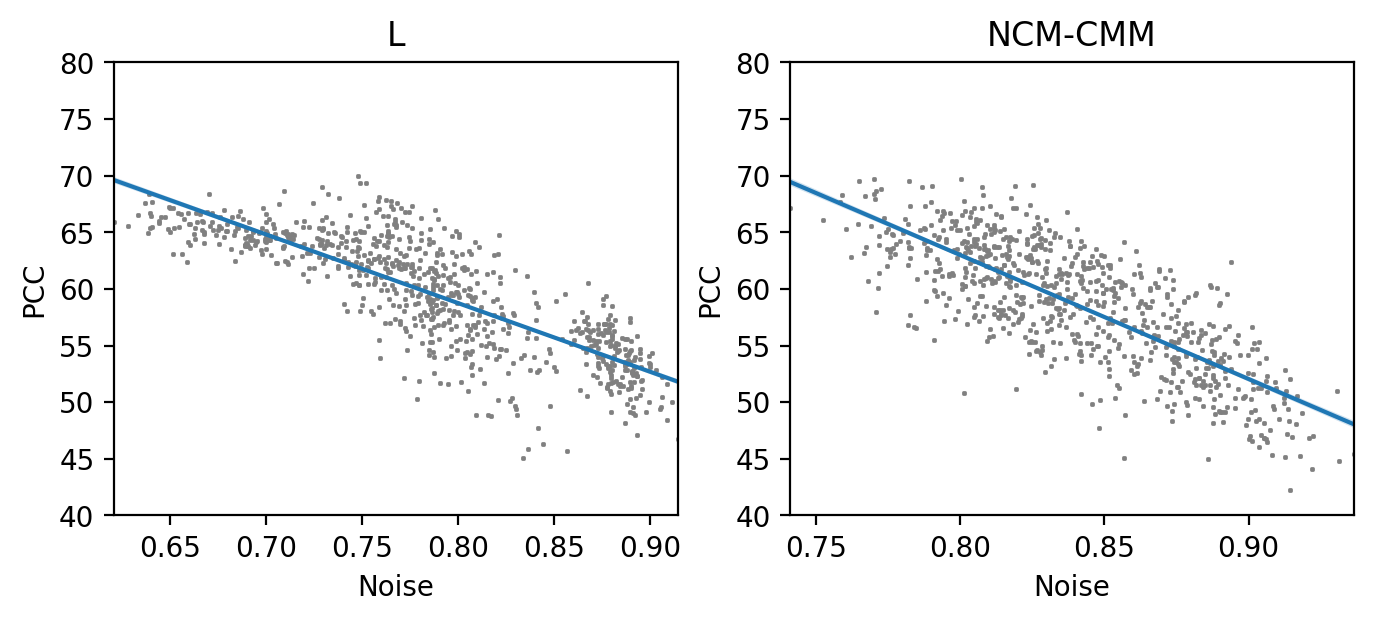

In [28]:
# indGood = (pcc > 30) This was used for the awake data but is not needed here
fig = plt.figure(figsize=(8,3), dpi=200)

nZones = len(zoneUnique)
for izone, zone in enumerate(zoneUnique):
    ax = plt.subplot(1, nZones, izone+1)
    r2adj, fval, pval, sse, sst = bivariateReg(noiseGroupZones[izone], pccZones[izone], 
                                     'Noise', 'PCC', title = zone, ylim = (40,80), ax=ax)
    n = len(noiseGroupZones[izone])
    k = 2 # bivariate regression
    nE = 20
    nEff = unitNumber[izone] - nE + 1
    fval = (nEff/n)*(sst-sse)/(sse/(n-k))       
    dfd = nEff - k
    pval = 1. - f.cdf(fval, dfn=1, dfd=dfd)
    print(zone, ': R2=', r2adj, 'F(1,', dfd, ')=' , fval, 'p=', pval)
    
plt.savefig('/Users/frederictheunissen/Desktop/scatterNoisePCCJulieZone.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


L : R2= 0.6877877261578116 F(1, 128 )= 286.1881388692613 p= 1.1102230246251565e-16
NCM-CMM : R2= 0.3465267157799746 F(1, 173 )= 92.90239932284828 p= 1.1102230246251565e-16


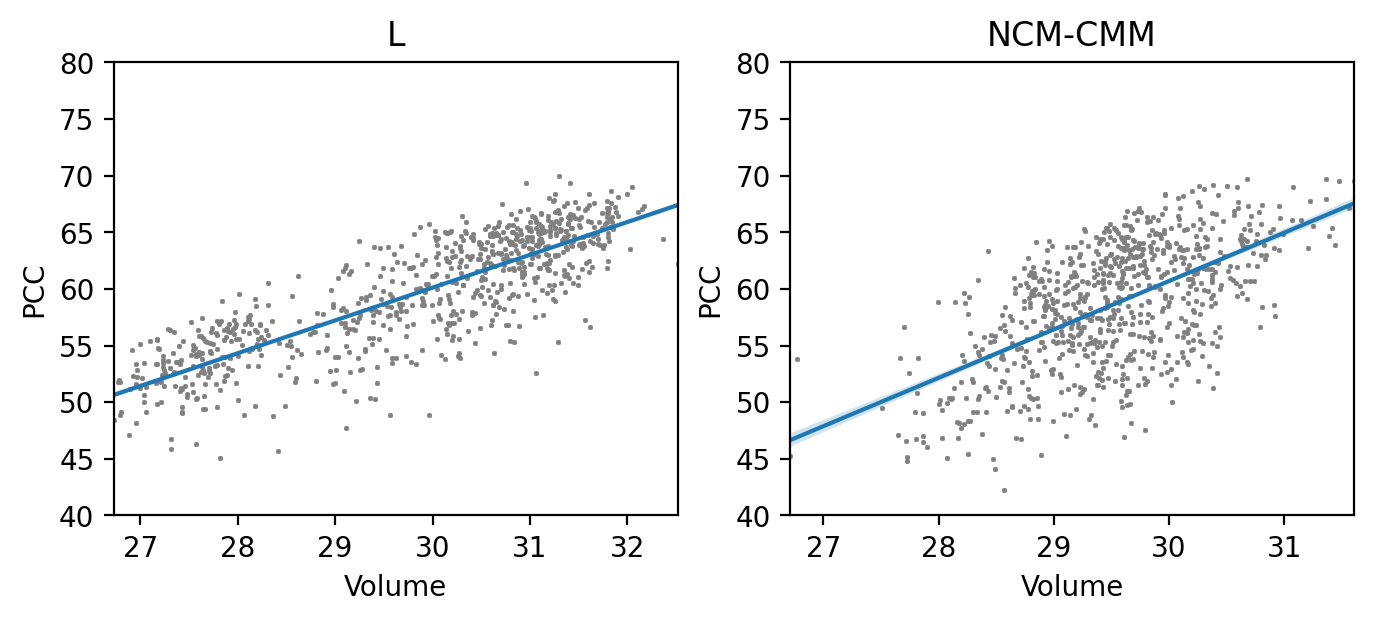

In [29]:
fig = plt.figure(figsize=(8,3), dpi=200)

nZones = len(zoneUnique)
for izone, zone in enumerate(zoneUnique):
    ax = plt.subplot(1, nZones, izone+1)

    r2adj, fval, pval, sse, sst = bivariateReg(np.log(volumeLDAZones[izone]), pccZones[izone], 'Volume', 'PCC', title = zone, ylim=(40,80), ax = ax)

    n = len(pccZones[izone])
    k = 2 # bivariate regression
    nE = 20
    nEff = unitNumber[izone] - nE + 1
    fval = (nEff/n)*(sst-sse)/(sse/(n-k))       
    dfd = nEff - k
    pval = 1. - f.cdf(fval, dfn=1, dfd=dfd)
    
    print(zone, ': R2=', r2adj, 'F(1,', dfd, ')=' , fval, 'p=', pval)
    
plt.savefig('/Users/frederictheunissen/Desktop/scatterVolumePCCJulieZone.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


L : R2= 0.2725998333915063 F(1, 128 )= 48.82015809074149 p= 1.3740275583984385e-10
NCM-CMM : R2= 0.07784951161030762 F(1, 173 )= 14.97383016003999 p= 0.00015423637065892226


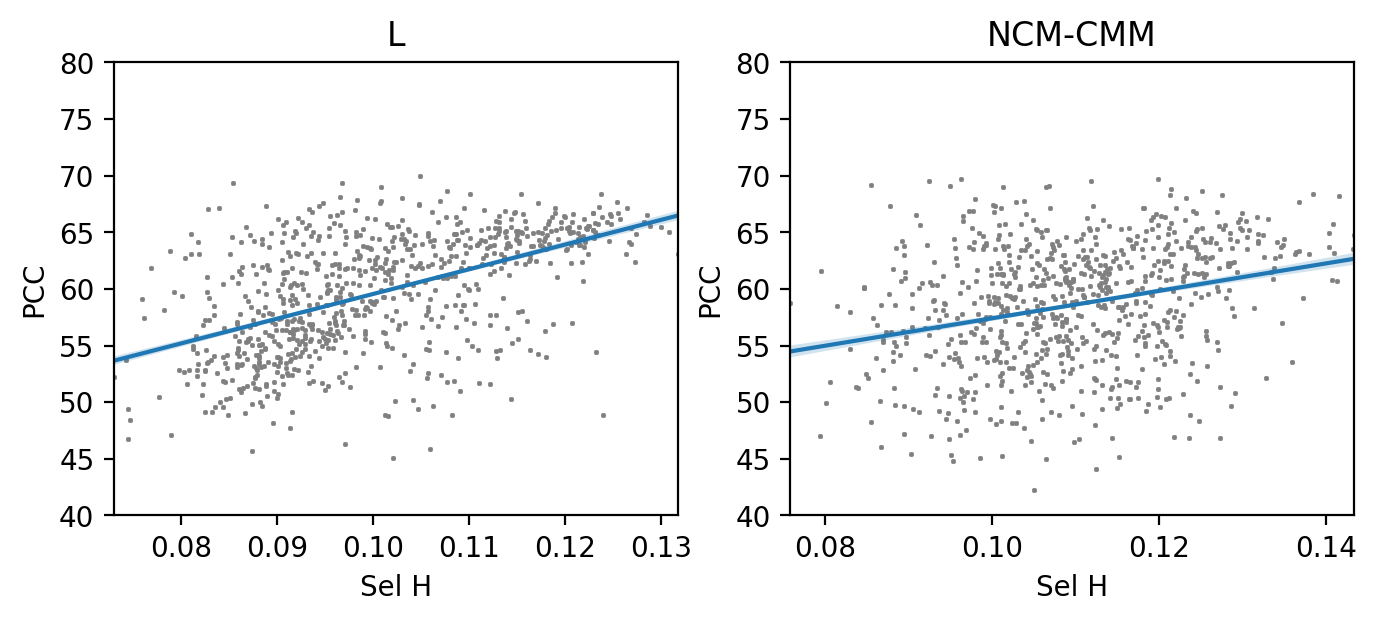

In [30]:
fig = plt.figure(figsize=(8,3), dpi=200)

nZones = len(zoneUnique)
for izone, zone in enumerate(zoneUnique):
    ax = plt.subplot(1, nZones, izone+1)

    r2adj, fval, pval, sse, sst = bivariateReg(selHGroupZones[izone], pccZones[izone],
                                     'Sel H', 'PCC', title = zone, ylim=(40,80), ax = ax)
    n = len(pccZones[izone])
    k = 2 # bivariate regression
    nE = 20
    nEff = unitNumber[izone] - nE + 1
    fval = (nEff/n)*(sst-sse)/(sse/(n-k))       
    dfd = nEff - k
    pval = 1. - f.cdf(fval, dfn=1, dfd=dfd)
    
    print(zone, ': R2=', r2adj, 'F(1,', dfd, ')=' , fval, 'p=', pval)
    
plt.savefig('/Users/frederictheunissen/Desktop/scatterSelHPCCJulieZone.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


L : R2= 0.00354138376814217 F(1, 128 )= 0.6237363955609733 p= 0.43112280768176414
NCM-CMM : R2= 0.022853095505159016 F(1, 173 )= 4.3061927032851655 p= 0.03945375616971203


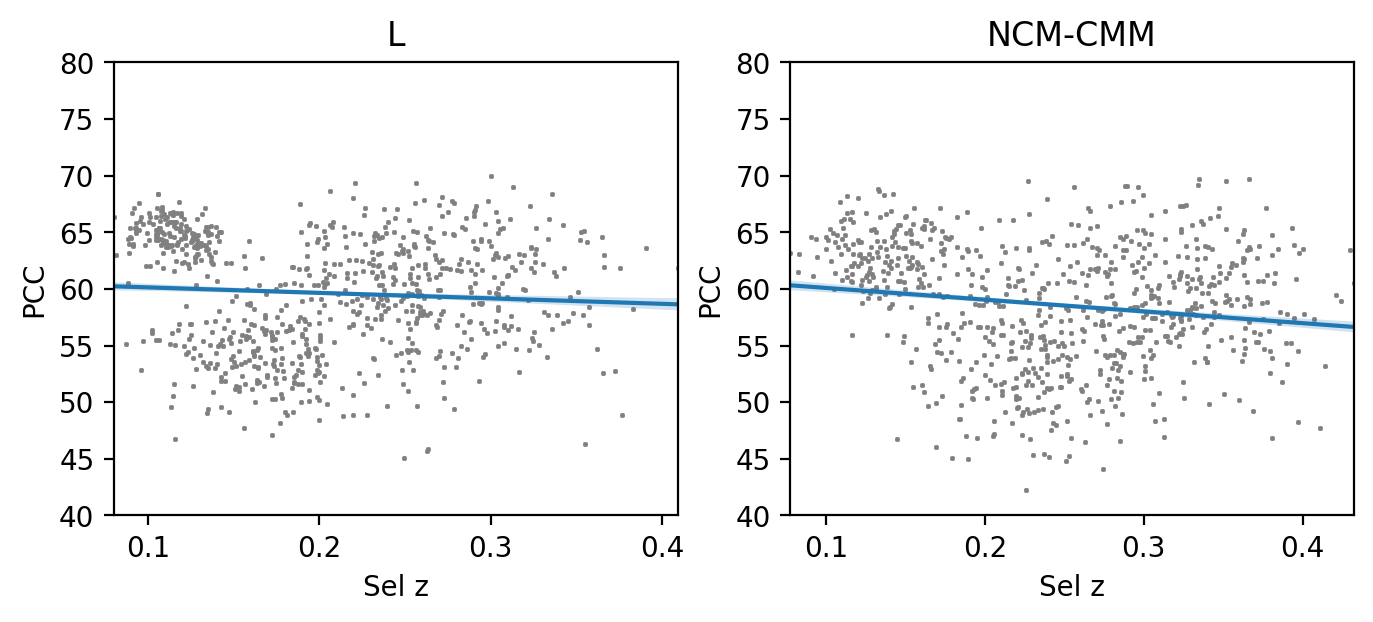

In [31]:
fig = plt.figure(figsize=(8,3), dpi=200)

nZones = len(zoneUnique)
for izone, zone in enumerate(zoneUnique):
    ax = plt.subplot(1, nZones, izone+1)

    r2adj, fval, pval, sse, sst = bivariateReg(selzGroupZones[izone], pccZones[izone], 
                                     'Sel z', 'PCC', title = zone, ylim=(40,80), ax = ax)
    
    n = len(pccZones[izone])
    k = 2 # bivariate regression
    nE = 20
    nEff = unitNumber[izone] - nE + 1
    fval = (nEff/n)*(sst-sse)/(sse/(n-k))       
    dfd = nEff - k
    pval = 1. - f.cdf(fval, dfn=1, dfd=dfd)
    
    print(zone, ': R2=', r2adj, 'F(1,', dfd, ')=' , fval, 'p=', pval)
    
plt.savefig('/Users/frederictheunissen/Desktop/scatterSelzPCCJulieZone.eps')


In [33]:
from sklearn.linear_model import LinearRegression
from scipy.stats import f

for izone, zone in enumerate(zoneUnique):
    X = np.vstack((noiseGroupZones[izone], np.log(volumeLDAZones[izone]), selHGroupZones[izone], selzGroupZones[izone])).transpose()
    y = pccZones[izone]

    myModel = LinearRegression().fit( X, y)
    y_pred = myModel.predict(X)

    # Calculate error and statistics
    n = len(y)       # Data points
    k = X.shape[1]+1   # Number of parameters in the model
    sse = np.sum((y-(y_pred))**2)
    sst = np.sum((y-np.mean(y))**2)

    r2adj = 1. - (sse/(n-k))/(sst/(n-1))
    
    nE = 20
    nEff = unitNumber[izone] - nE + 1
    fval = (nEff/n)*((sst-sse)/(k-1))/(sse/(n-k))       
    dfd = nEff - k
    pval = 1. - f.cdf(fval, dfn=k-1, dfd=dfd)


    print(zone, ': R2=', r2adj, 'F(', k-1, ',', dfd, ')=' , fval, 'p=', pval) 



L : R2= 0.7522007052892175 F( 4 , 125 )= 98.69366279187234 p= 1.1102230246251565e-16
NCM-CMM : R2= 0.6926597816037424 F( 4 , 170 )= 98.69577044509917 p= 1.1102230246251565e-16


In [34]:
for izone, zone in enumerate(zoneUnique):
    X = np.vstack((noiseGroupZones[izone], np.log(volumeLDAZones[izone]))).transpose()
    y = pccZones[izone]

    myModel = LinearRegression().fit( X, y)
    y_pred = myModel.predict(X)

    # Calculate error and statistics
    n = len(y)       # Data points
    k = X.shape[1]+1   # Number of parameters in the model
    sse = np.sum((y-(y_pred))**2)
    sst = np.sum((y-np.mean(y))**2)

    r2adj = 1. - (sse/(n-k))/(sst/(n-1))
    

    nE = 20
    nEff = unitNumber[izone] - nE + 1
    fval = (nEff/n)*((sst-sse)/(k-1))/(sse/(n-k))       
    dfd = nEff - k
    pval = 1. - f.cdf(fval, dfn=k-1, dfd=dfd)


    print(zone, ': R2=', r2adj, 'F(', k-1, ',', dfd, ')=' , fval, 'p=', pval)

L : R2= 0.7373050899683791 F( 2 , 127 )= 182.36986100063007 p= 1.1102230246251565e-16
NCM-CMM : R2= 0.6328134241992414 F( 2 , 172 )= 150.828686272249 p= 1.1102230246251565e-16
